In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

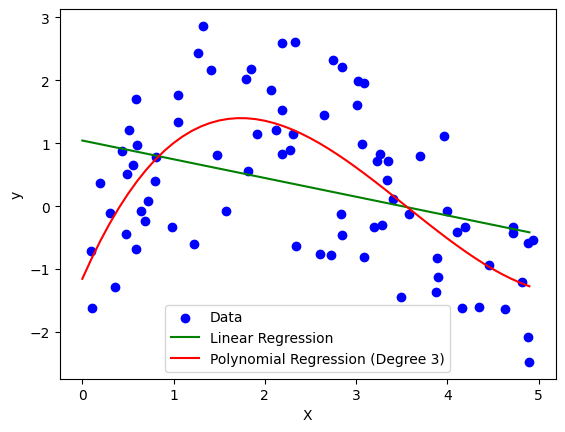

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate some sample data
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.randn(80)

# Fit a linear regression model to the data
linear_reg = LinearRegression()
linear_reg.fit(X, y)

# Generate a range of X values for prediction
X_range = np.arange(0, 5, 0.1)[:, np.newaxis]

# Transform the input data to include polynomial features (e.g., X^2)
degree = 3  # You can change the degree to control the polynomial order
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

# Fit a polynomial regression model to the transformed data
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

# Predict the values for the X_range using the polynomial regression model
X_range_poly = poly_features.transform(X_range)
y_poly_pred = poly_reg.predict(X_range_poly)

# Plot the data and regression lines
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X_range, linear_reg.predict(X_range), color='green', label='Linear Regression')
plt.plot(X_range, y_poly_pred, color='red', label='Polynomial Regression (Degree {})'.format(degree))
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()